In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_diabetes

In [3]:
df=load_diabetes()
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
#Creating the independent and the dependent feature
x=df.data
y=df.target

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
print(x_train.shape)
print(x_test.shape)

(353, 10)
(89, 10)


In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred=lr.predict(x_test)

In [9]:
print(lr.coef_)
print(lr.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [10]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score:",r2_score(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))

R2 score: 0.4399338661568968
Mean squared error: 3094.4566715660626


In [15]:
#Applying the ridge regression
from sklearn.linear_model import Ridge
#Creatingt he object of the Ridge
ridge=Ridge(alpha=100000)
ridge.fit(x_train,y_train)

Ridge(alpha=100000)

In [16]:
y_pred1=ridge.predict(x_test)

In [17]:
print(ridge.coef_)
print(ridge.intercept_)

[ 0.00296842  0.00070013  0.00770694  0.00599277  0.00284245  0.00227272
 -0.0049699   0.00528873  0.00763383  0.00472551]
150.4589824154056


In [18]:
print("R2 score:",r2_score(y_test,y_pred1))
print("Mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score: -0.012493689570653332
Mean squared error: 74.79433571886918


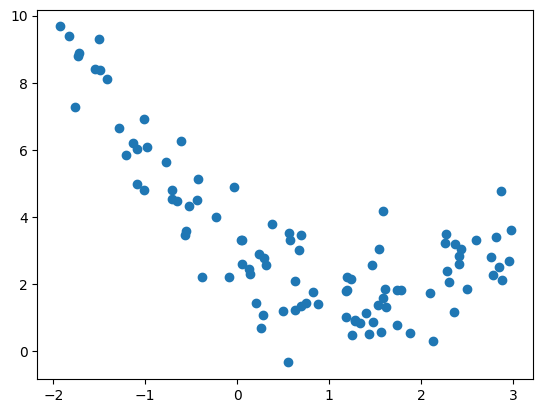

In [20]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

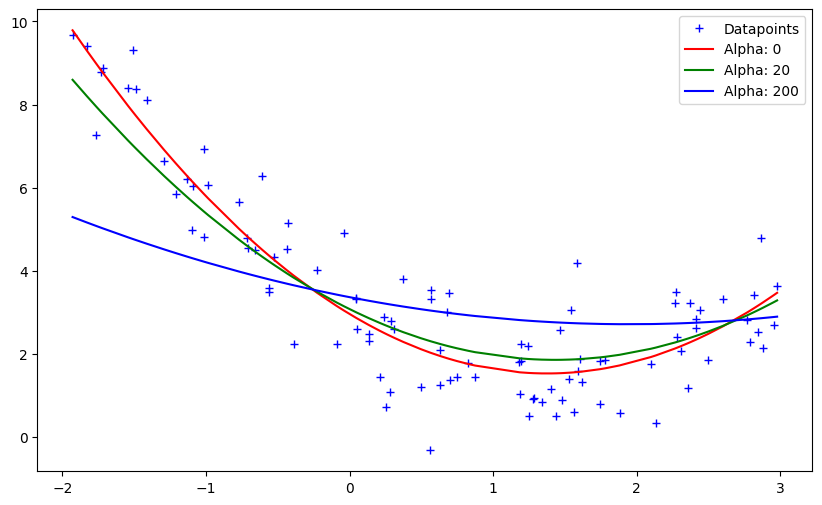

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model=Pipeline([
        ('poly_feats',PolynomialFeatures(degree=2)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)
alphas=[0,20,200]
cs=['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')
for alpha,c in zip(alphas,cs):
    preds=get_preds_ridge(x1,x2,alpha)
    #plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

    #plt.plot(sorted(x1[:,0]),preds[np.argsort([x1[:,0])]])
plt.legend()
plt.show()

In [24]:
#def linear_regression(X,y,alpha=1):
#    x_mean=X.mean()
#    y_mean=y.mean()
#    num=0
#    den=0
#    for i in range(X.shape[0]):
#        num=num+(y[i]-y_mean)*(X[i]-x_mean)
#        den=den+(X[i]-x_mean)*(X[i]-x_mean)
#    m=num/(den+alpha)
#    b=y_mean-m*x_mean
#    return m,b
class MYRidge:
    def __init_(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None
    
    def fit(self,x_train,y_train):
        num=0
        den=0
        for i in range(x_train.shape[0]):
            num=num+(y_train[i]-y_train.mean())*(x_train[i]-x_train.mean())
            den=den+(x_train[i]-x_train.mean())*(x_train[i]-x_train.mean())
        
        self.m=num/(den+self.alpha)
        self.b=y_train.mean()-(self.m*x_train.mean())
        print(self.m,self.b)
    
    def predict(x_test):
        pass

In [31]:
#linear_regression(X,y,100)
ridge=MYRidge(alpha=100)
ridge.fit(x,y)

TypeError: MYRidge() takes no arguments